# Numerical Computing: Homework 4

* Linear algebra with Python


##### Authors:

* alberto.suarez@uam.es
* Student 1: David Álvarez Sáez
* Student 2: Andrés Teruel Fernández

#### Instructions

* The code should follow 
    * PEP 20 – The Zen of Python. https://peps.python.org/pep-0020    
    * PEP 8 – Style Guide for Python Code. <https://peps.python.org/pep-0008>
    * PEP 257 – Docstring Conventions. https://peps.python.org/pep-0257
    * Type hints. https://docs.python.org/3/library/typing.html
    * Mypy. https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html
    * Google Python sytle guide. https://google.github.io/styleguide/pyguide.html  

* Please use Markdown [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet] cells with formulas in latex for the derivations. Alternatively, insert a scanned image of the derivations, as it is here done with the Alan Turing [https://www.turing.org.uk/] picture.


![alt text](alan-turing.jpg "Alan Turing")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython

from scipy.stats import multivariate_normal
from numpy.typing import NDArray, ArrayLike
from matplotlib import cm
from IPython.display import display, Latex

from numerical_computing_HW_004_linear_algebra_2024_10_06 import *

"""
from numerical_computing_HW_004_linear_algebra_2024_10_06 import (
    multivariate_normal_pdf, 
    rotation_matrix_2D, 
    remove_sign_eigenvectors,
    make_data_matrix,
    linear_fit,
)
"""
%matplotlib notebook
%matplotlib widget
%load_ext autoreload
%autoreload 2

### Generation of synthetic regression problem

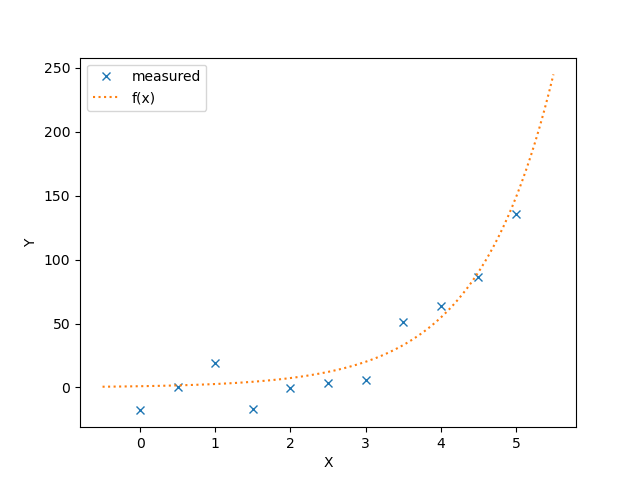

In [4]:
f = np.exp 

x_low, x_up = 0.0, 5.0

n_train = 11
x_train = np.linspace(x_low, x_up, num=n_train)                                                                                                  
rng = np.random.default_rng(seed=8123)
y_train = f(x_train) 
noise_level = 0.5 * np.mean(np.abs(y_train))
y_train += noise_level * rng.standard_normal(np.size(x_train))


n_test = 100
slack = 0.1
delta_x = x_up - x_low
x_test = np.linspace(x_low - slack*delta_x, x_up + slack*delta_x, num=n_test)                                                                                                  
y_test_true = f(x_test)

fig, ax = plt.subplots()
ax.plot(x_train, y_train,'x', label='measured')
ax.plot(x_test, y_test_true, ':', label='f(x)')
ax.set(xlabel='X', ylabel='Y')
_ = ax.legend()


###  Linear and regularized linear regression


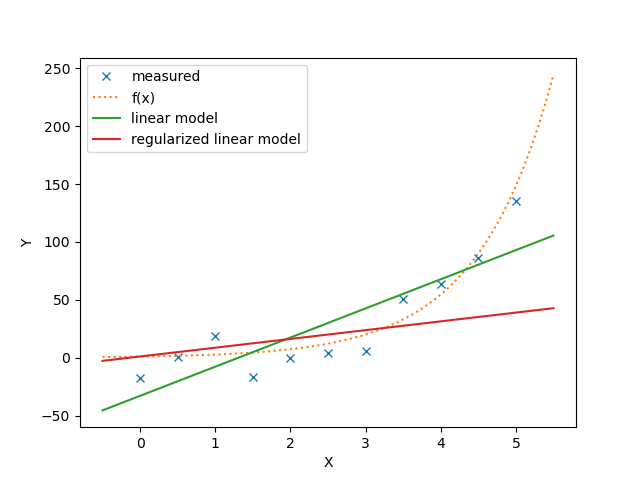

In [8]:
_, dimension, X_test = make_data_matrix(
    x_test,
    include_bias=True
)

beta = linear_fit(x_train, y_train) 
y_test_pred = X_test @ beta

beta_regularized = linear_fit(x_train, y_train, regularization_rate=100.0)

y_test_pred_regularized = X_test @ beta_regularized

fig, ax = plt.subplots()
ax.plot(x_train, y_train,'x', label='measured')
ax.plot(x_test, y_test_true, ':', label='f(x)')
ax.plot(x_test, y_test_pred, '', label='linear model')
ax.plot(x_test, y_test_pred_regularized, '', label='regularized linear model')
ax.set(xlabel='X', ylabel='Y')
_ = ax.legend()


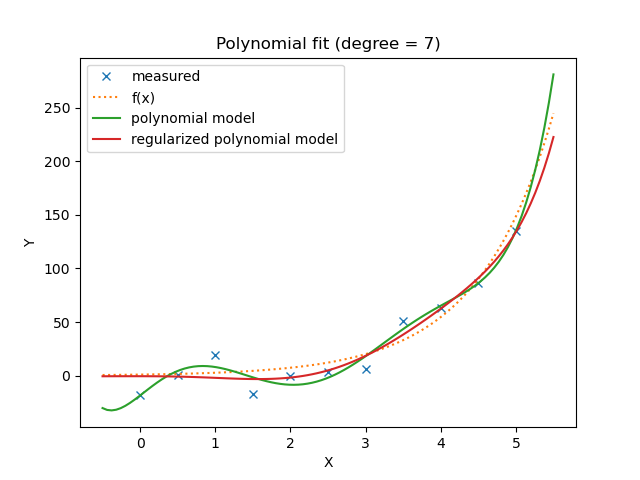

In [9]:
degree = 7
X_embedded = polynomial_features(
    np.hstack((x_train, x_test)),
    degree, 
    include_bias=True
)

X_train_embedded = X_embedded[:n_train, :] 
X_test_embedded = X_embedded[n_train:, :] 

beta = linear_fit(X_train_embedded, y_train, fit_intercept=False) 
y_test_pred = X_test_embedded @ beta


beta_regularized = linear_fit(
    X_train_embedded, 
    y_train, 
    regularization_rate=20.0,
    fit_intercept=False
)

y_test_pred_regularized = X_test_embedded @ beta_regularized

fig, ax = plt.subplots()
ax.plot(x_train, y_train,'x', label='measured')
ax.plot(x_test, y_test_true, ':', label='f(x)')
ax.plot(x_test, y_test_pred, '', label='polynomial model')
ax.plot(x_test, y_test_pred_regularized, '', label='regularized polynomial model')
ax.set(xlabel='X', ylabel='Y', title='Polynomial fit (degree = {:d})'.format(degree))

_ = ax.legend()


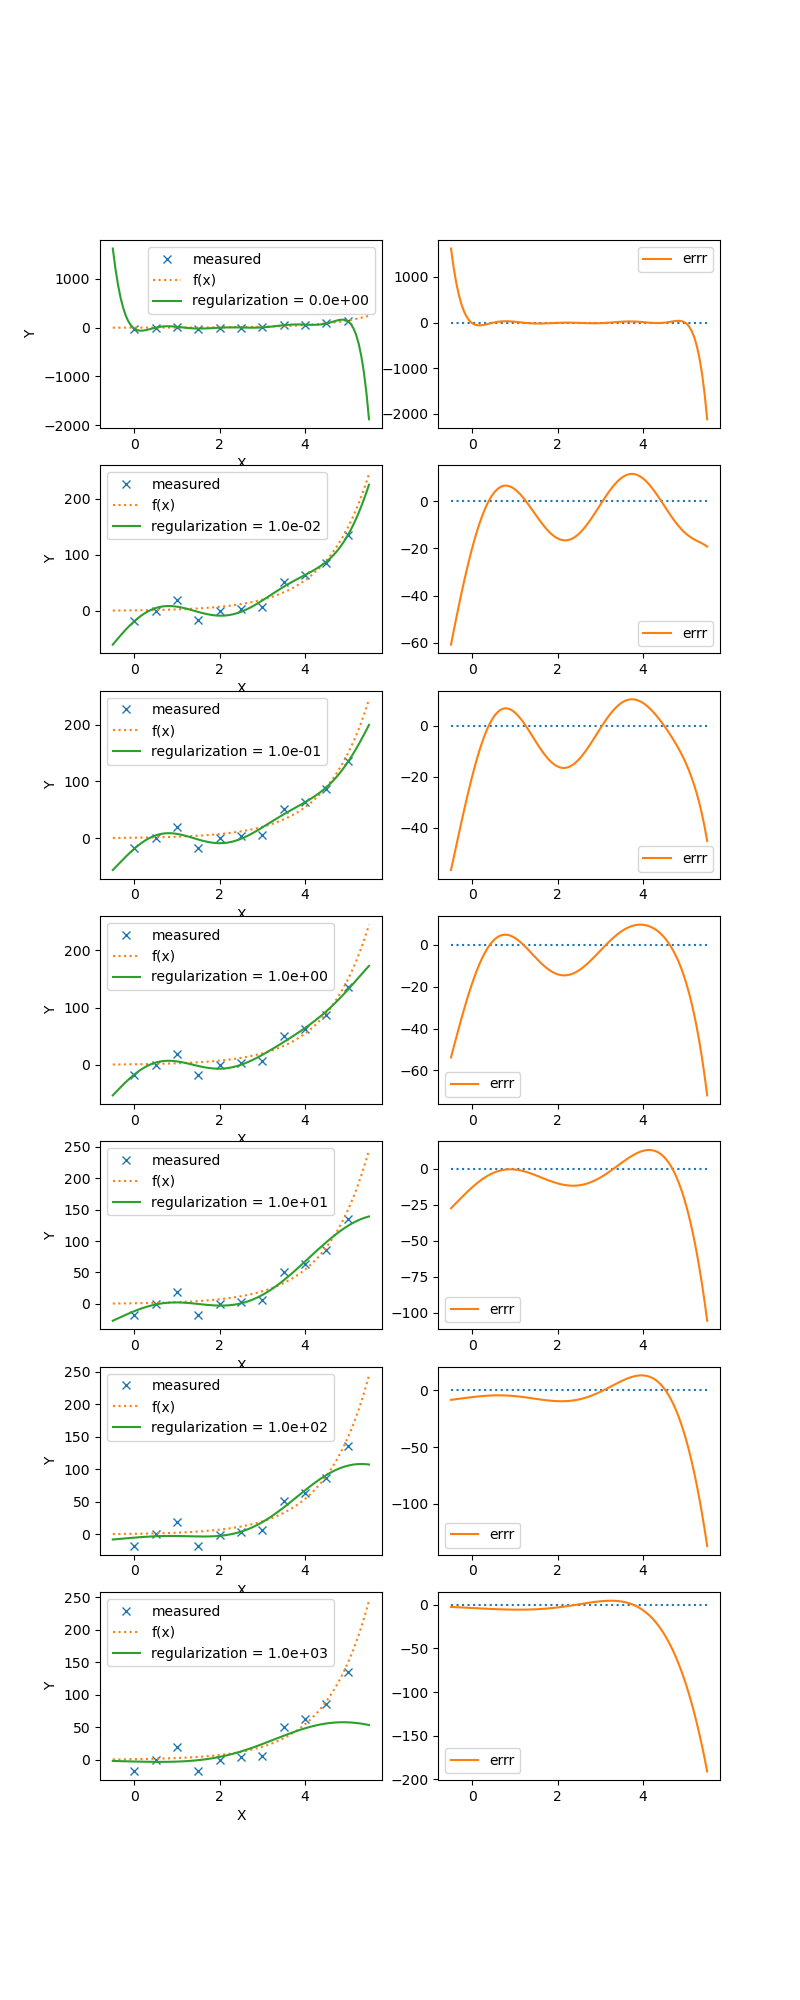

In [12]:
n_features = 1000
scale = 0.1
include_bias=True 

X_embedded = random_Fourier_features(
    np.hstack((x_train, x_test)),
    n_features,
    np.random.default_rng(seed=123).standard_normal,
    scale, 
    include_bias
)

X_train_embedded = X_embedded[:n_train, :] 
X_test_embedded = X_embedded[n_train:, :] 

regularization_rates = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

fig, axs = plt.subplots(
    len(regularization_rates), 
    2,
    figsize=(8, 20)
)

for i, regularization_rate in enumerate(regularization_rates):
    beta_regularized = linear_fit(
        X_train_embedded, 
        y_train, 
        regularization_rate,
        fit_intercept=False
    )
    y_test_pred_regularized = X_test_embedded @ beta_regularized

    axs[i, 0].plot(x_train, y_train,'x', label='measured')
    axs[i, 0].plot(x_test, y_test_true, ':', label='f(x)')
    axs[i, 0].plot(
        x_test, 
        y_test_pred_regularized,
        label='regularization = {:.1e}'.format(regularization_rate)
    )
    axs[i, 0].set(xlabel='X', ylabel='Y')
    axs[i, 0].legend()    
    
    axs[i, 1].plot(x_test, np.zeros_like(x_test), ':')
    axs[i, 1].plot(x_test, y_test_pred_regularized - y_test_true, label='errr')
    axs[i, 1].legend()    
    


# Diagonalization of a matrix

In [14]:
A = np.array(
    [[2.0, -1.0], 
     [5.0, -7.0]]
)

eigenvalues, eigenvectors = np.linalg.eig(A) 

Lambda = np.diag(eigenvalues)

print('Matrix')
print(A)

print('\nVector of eigenvalues')
print(eigenvalues)

print('\nMatrix of eigenvalues')
print(Lambda)


print('\nDiagonalization (similarity transformation):')
print(np.linalg.inv(eigenvectors) @ A @ eigenvectors)

print('\nThe original matrix can be recovered using the inverse of the similarity transformation:')
print(eigenvectors @ Lambda @ np.linalg.inv(eigenvectors))


Matrix
[[ 2. -1.]
 [ 5. -7.]]

Vector of eigenvalues
[ 1.40512484 -6.40512484]

Matrix of eigenvalues
[[ 1.40512484  0.        ]
 [ 0.         -6.40512484]]

Diagonalization (similarity transformation):
[[ 1.40512484e+00 -2.77555756e-17]
 [-8.88178420e-16 -6.40512484e+00]]

The original matrix can be recovered using the inverse of the similarity transformation:
[[ 2. -1.]
 [ 5. -7.]]


### Properties of the eigenvectors

In [18]:
print('\nMatrix of eigenvectors (eigenvectors by columns):')
print(eigenvectors)

print('\nThe eigenvectors are normalized')
print(np.sum(eigenvectors**2, axis=0))

print('\nThe eigenvectors are not necessarily orthogonal')
print(eigenvectors[:, 0].T @ eigenvectors[:, 1])

print('\nThe eigenvectors are invariant to a sign change:')
eigenvectors *= - np.ones_like(eigenvectors)
print(eigenvectors)

print('\nDiagonalization (similarity transformation):')
print(np.linalg.inv(eigenvectors) @ A @ eigenvectors)

print('\nThe original matrix can be recovered using the inverse of the similarity transformation:')
print(eigenvectors @ Lambda @ np.linalg.inv(eigenvectors))

print(
    '\nIt is customary to choose the sign so that '      
    + 'the first non-zero element of each eigenvector is positive'
)
eigenvectors = remove_sign_column_vectors(eigenvectors)
print(eigenvectors)



Matrix of eigenvectors (eigenvectors by columns):
[[0.85942994 0.11814182]
 [0.51125353 0.99299673]]

The eigenvectors are normalized
[1. 1.]

The eigenvectors are not necessarily orthogonal
0.6092076990801716

The eigenvectors are invariant to a sign change:
[[-0.85942994 -0.11814182]
 [-0.51125353 -0.99299673]]

Diagonalization (similarity transformation):
[[ 1.40512484e+00 -2.77555756e-17]
 [-8.88178420e-16 -6.40512484e+00]]

The original matrix can be recovered using the inverse of the similarity transformation:
[[ 2. -1.]
 [ 5. -7.]]

It is customary to choose the sign so that the first non-zero element of each eigenvector is positive
[[0.85942994 0.11814182]
 [0.51125353 0.99299673]]


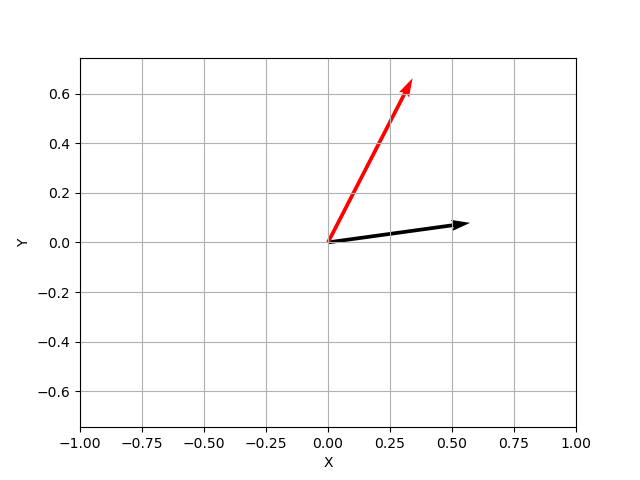

In [20]:
fig, ax = plt.subplots()

origin_point = np.zeros((2, 2))

lines = ax.quiver(
    *origin_point,
    *(eigenvectors.T),
    color=['k', 'r'],
    scale_units='x', 
    scale=1.5,
)

_ = ax.axis('equal')
_ = ax.grid()

_ = ax.set(
    xlim=(-1.0, 1.0), 
    ylim=(-1.0, 1.0),
    xlabel='X', ylabel='Y'
)

# Multivariate Gaussian distribution

In [23]:
mu = np.array([-1.0, 5.0])

sigma_x = 2.5
sigma_y = 3.0
rho = -0.6

Sigma = np.array(
    [[sigma_x ** 2, rho * sigma_x * sigma_y],
     [rho * sigma_x * sigma_y, sigma_y**2]]
)

X = np.array(
    [[-1.0, 5.0],
     [ 2.0, 0.0],
     [-5.0, 1.0]]
)

print(multivariate_normal_pdf(X, mu, Sigma)) # Our implementation (used here only for illustration)
print(multivariate_normal.pdf(X, mu, Sigma)) # Scipy implementation (recommened)

[0.02652582 0.00641077 0.00012114]
[0.02652582 0.00641077 0.00012114]


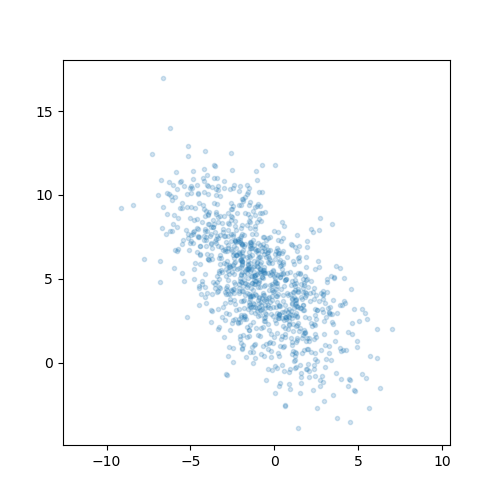

In [25]:
rng = np.random.default_rng()
X_rnd, Y_rnd = rng.multivariate_normal(mu, Sigma, 1000).T
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.plot(X_rnd, Y_rnd, 'o', alpha = 0.2, markersize=3)
_ = ax.axis('equal')


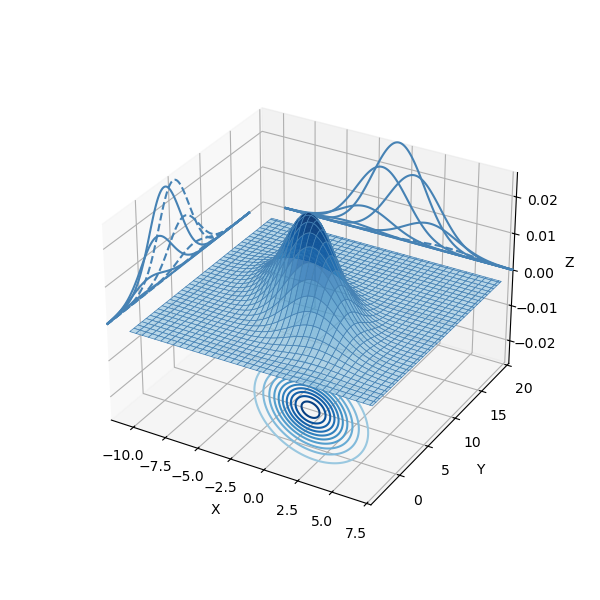

In [27]:
n_plot = 300
slack = 0.05
x_min, x_max = np.min(X_rnd), np.max(X_rnd)
x_range = x_max - x_min
x_min = x_min - slack * x_range
x_max = x_max + slack * x_range

y_min, y_max = np.min(Y_rnd), np.max(Y_rnd)
y_range = y_max - y_min
y_min = y_min - slack * y_range
y_max = y_max + slack * y_range

x_plot = np.linspace(x_min, x_max, n_plot)  
y_plot = np.linspace(y_min, y_max, n_plot)  


X_plot, Y_plot = np.meshgrid(x_plot, y_plot)
shape_X_plot = np.shape(X_plot)
Z_plot = multivariate_normal_pdf(
    np.column_stack((np.ravel(X_plot), np.ravel(Y_plot))),
    mu, 
    Sigma
) 
Z_plot = np.reshape(Z_plot, shape_X_plot)
z_max = Z_plot.max()
z_min = -z_max 
color_intensity_min = -z_max / 2
color = 'steelblue'

ax = plt.figure(figsize=(6, 6)).add_subplot(projection='3d')
ax.plot_surface(
    X_plot, 
    Y_plot, 
    Z_plot, 
    edgecolor=color,
    cmap=cm.Blues,
    vmin=color_intensity_min,
    lw=0.5, 
    rstride=8, 
    cstride=8,
    alpha=0.8
)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
n_levels = 10
offset_x = x_min - 0.1*(x_max - x_min)
ax.contour(X_plot, Y_plot, Z_plot, zdir='x', levels=n_levels, offset=offset_x, colors=color)
offset_y = y_max + 0.1*(y_max - y_min)
ax.contour(X_plot, Y_plot, Z_plot, zdir='y', levels=n_levels, offset=offset_y, colors=color)
ax.contour(X_plot, Y_plot, Z_plot, zdir='z', levels=n_levels, offset=z_min, cmap='Blues', vmin=color_intensity_min)

ax.set(xlim=(offset_x, x_max), 
       ylim=(y_min, offset_y), 
       zlim=(z_min, z_max),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()


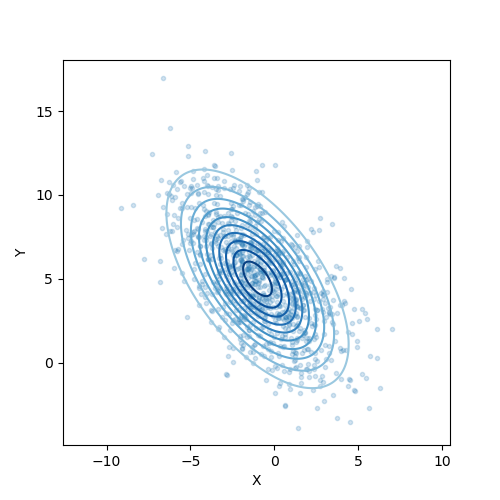

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
_ = ax.plot(X_rnd, Y_rnd, '.', alpha=0.2)
_ = ax.axis('equal')
ax.contour(X_plot, Y_plot, Z_plot, cmap='Blues', levels=n_levels, vmin=color_intensity_min)
ax.set(
    xlim=(x_min, x_max), 
    ylim=(y_min, y_max),
    xlabel='X', ylabel='Y'
)

_ = plt.plot()


### Diagonalization of a symmetric matrix

    

In [32]:

# when matrix is symmetric (real) or Hermitian (complex)
# `np.linalg.eigh` is preferable to `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eigh(Sigma) 
Lambda = np.diag(eigenvalues)

print('Covariance matrix')
print(np.asarray(Sigma))

print('\nVctor of eigenvalues')
print(eigenvalues)

print('\nMatrix of eigenvalues')
print(Lambda)

print('\nMatrix of eigenvectors (eigenvectors by columns):')
print(eigenvectors)

print('\nDiagonalization (similarity transformation):')
print(np.linalg.inv(eigenvectors) @ Sigma @ eigenvectors)

print('\nThe original matrix can be recovered using the inverse of the similarity transformation:')
print(eigenvectors @ Lambda @ np.linalg.inv(eigenvectors))


Covariance matrix
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]

Vctor of eigenvalues
[ 2.91961744 12.33038256]

Matrix of eigenvalues
[[ 2.91961744  0.        ]
 [ 0.         12.33038256]]

Matrix of eigenvectors (eigenvectors by columns):
[[-0.80380922 -0.59488716]
 [-0.59488716  0.80380922]]

Diagonalization (similarity transformation):
[[2.91961744e+00 2.22044605e-16]
 [0.00000000e+00 1.23303826e+01]]

The original matrix can be recovered using the inverse of the similarity transformation:
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]


### Diagonalization of a symmetric matrix using orthogonal transformation

In [35]:
print('Covariance matrices are symmetric and positive definite')
print(np.asarray(Sigma))

print('\nThe eigenvectors of a symmetric matrix are orthogonal:')
print(eigenvectors[:, 0].T @ eigenvectors[:, 1])

print('\nThe matrix of eigenvectors is orthogonal (the inverse is simply the transpose):')
print( eigenvectors.T @ eigenvectors,'\n')
print(eigenvectors @ eigenvectors.T)

print('\nThe matrix of eigenvectors is a rotation:')
theta = np.arctan(eigenvectors[1, 0] / eigenvectors[0, 0])
print('rotation angle (radians)', theta)
print(rotation_matrix_2D(theta))

print('\n Symmetric matrices can be diagonalized using an orthogonal transformation:')
print(eigenvectors.T @ Sigma @ eigenvectors)

print('\n The original matrix can be recovered using the inverse rotation:')
print(eigenvectors @ Lambda @ eigenvectors.T)


Covariance matrices are symmetric and positive definite
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]

The eigenvectors of a symmetric matrix are orthogonal:
0.0

The matrix of eigenvectors is orthogonal (the inverse is simply the transpose):
[[1.00000000e+00 2.39439588e-17]
 [2.39439588e-17 1.00000000e+00]] 

[[1.00000000e+00 2.39439588e-17]
 [2.39439588e-17 1.00000000e+00]]

The matrix of eigenvectors is a rotation:
rotation angle (radians) 0.6371252588625981
[[ 0.80380922 -0.59488716]
 [ 0.59488716  0.80380922]]

 Symmetric matrices can be diagonalized using an orthogonal transformation:
[[2.91961744e+00 2.22044605e-16]
 [0.00000000e+00 1.23303826e+01]]

 The original matrix can be recovered using the inverse rotation:
[[ 6.25 -4.5 ]
 [-4.5   9.  ]]


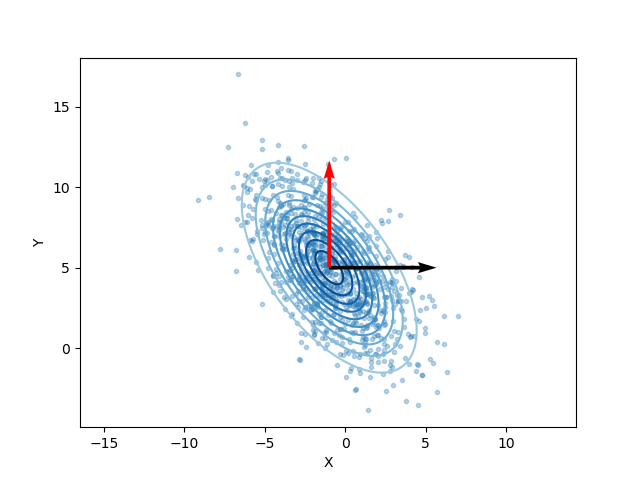

In [37]:
fig, ax = plt.subplots()

coordinate_system = np.eye(2)
origin_point = (mu * np.ones_like(coordinate_system)).T

lines = ax.quiver(
    *origin_point,
    *coordinate_system,
    color=['k', 'r'],
    scale_units='xy', 
    scale=0.15,
    zorder=2
)
_ = ax.axis('equal')
ax.set(
    xlim=(x_min, x_max), 
    ylim=(y_min, y_max),
    xlabel='X', ylabel='Y'
)

ax.plot(X_rnd, Y_rnd, '.', alpha=0.3, zorder=0)
ax.contour(
    X_plot, 
    Y_plot, 
    Z_plot, 
    cmap='Blues', 
    levels=n_levels, 
    vmin=color_intensity_min,
    zorder=1,
)


sqrt_eigenvalues = np.sqrt(eigenvalues)
n_frames = 500
T = 3
t_rotation =  T / 3
t_stretching = 2 * t_rotation
t = np.linspace(0, T, n_frames)


def update(frame):
    # for each frame, update the data stored on each artist.
    if (t[frame] < t_rotation):
        coordinate_system = rotation_matrix_2D(theta * t[frame])
        lines.set_UVC(*coordinate_system)
    elif (t[frame] < t_stretching): 
        fraction = t[frame] / t_rotation - 1.0
        lines.set_UVC(
            *(
                ((1.0 - fraction) + 0.32 * fraction * sqrt_eigenvalues) 
                * rotation_matrix_2D(theta)
            )
        )
    return lines

ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=1)

### Cholesky descomposition

A symmetric positive-definite matrix can be decomposed as
$$
\boldsymbol{\Sigma} = \mathbf{L} \mathbf{L}^{\top},
$$
where $\mathbf{L}$ is a lower-triangular matrix (that is, it has zeros above its diagonal).

One of the applications of this decomposition is to generate multivariate normal random vectors whose distribution is $\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right)$ (correlated components) from multivariate normal random vectors whose distribution is $\mathbf{Z} \sim N\left(\mathbf{0}, \mathbf{I}\right)$ (independent components):
$$
\mathbf{X} = \boldsymbol{\mu} + \mathbf{L} \mathbf{Z}
$$


Consider the symmetric matrix:
[[10.5 -3.3  1. ]
 [-3.3  5.7  2.4]
 [ 1.   2.4  2.9]]

It is positive sefinite (its eigenvalues are larger than zero).
[ 0.8054923   6.10943588 12.18507183]

Its Cholesky decomposition is:
[[ 3.24037035  0.          0.        ]
 [-1.01840211  2.15936499  0.        ]
 [ 0.3086067   1.25698329  1.10668645]]

Use the Cholesky decomposition generate multivariate normal random vectors with independent components


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

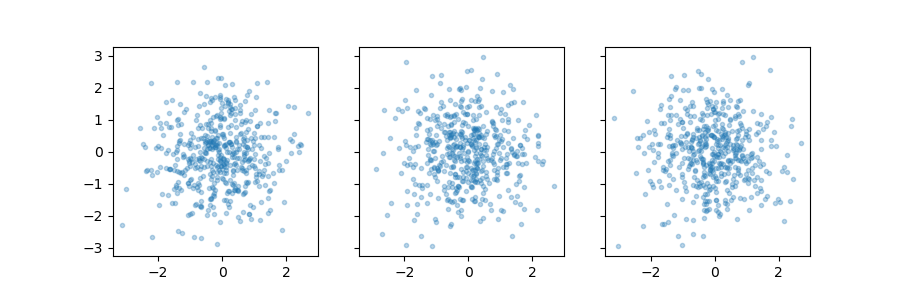

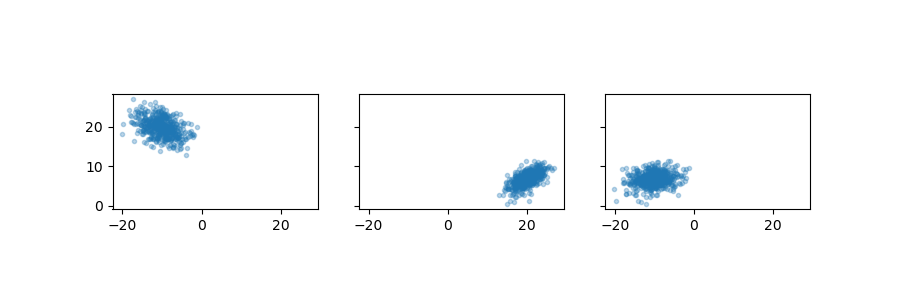

In [40]:
print('Consider the symmetric matrix:')

Sigma = np.array(
    [[ 10.5, -3.3, 1.0],
     [ -3.3,  5.7, 2.4],
     [  1.0,  2.4, 2.9]]
)

print(Sigma)


print('\nIt is positive sefinite (its eigenvalues are larger than zero).')

eigenvalues, _ = np.linalg.eigh(Sigma)
print(eigenvalues)

print('\nIts Cholesky decomposition is:')
L = np.linalg.cholesky(Sigma)
print(L)

print('\nUse the Cholesky decomposition generate multivariate normal random vectors with independent components')
n_samples = 500
mu = np.array([-10.0, 20.0, 7.0])
dimension = len(mu)
rng = np.random.default_rng()

Z = rng.multivariate_normal(
    np.zeros(dimension), 
    np.eye(dimension), 
    n_samples
)

X = mu + Z @ L.T


display(Latex(r'$\mathbf{Z} \sim N\left(\mathbf{0}, \mathbf{I}\right)$'))

fig, axs = plt.subplots(1, 3, figsize = (9, 3), sharex=True, sharey=True)
axs[0].scatter(Z[:, 0], Z[:, 1], marker='.', alpha=0.3)
axs[0].set_aspect('equal')
axs[1].scatter(Z[:, 1], Z[:, 2], marker='.', alpha=0.3)
axs[1].set_aspect('equal')
axs[2].scatter(Z[:, 0], Z[:, 2], marker='.', alpha=0.3)
axs[2].set_aspect('equal')

display(Latex(r'$\mathbf{X} \sim N\left(\boldsymbol{\mu}, \boldsymbol{\Sigma}\right)$'))
fig, axs = plt.subplots(1, 3, figsize = (9, 3), sharex=True, sharey=True)
axs[0].scatter(X[:, 0], X[:, 1], marker='.', alpha=0.3)
axs[0].set_aspect('equal')
axs[1].scatter(X[:, 1], X[:, 2], marker='.', alpha=0.3)
axs[1].set_aspect('equal')
axs[2].scatter(X[:, 0], X[:, 2], marker='.', alpha=0.3)
axs[2].set_aspect('equal')




# Exercises

## Exercise 1.

Complete the code of the function `random_Fourier_features` so that the example in this notebook works as illustrated with dephased-cosine features. The expression of these types of random Fourier features is given in Eq.(15) of reference https://gregorygundersen.com/blog/2019/12/23/random-fourier-features/

## Exercise 2

Complete the code of the function `polynomial features` so that one can construct polynomial features for cases in which the instances are characterized by 2 or more attributes. For instance, if the $n$-th example is characterized by the vector of attributes 
$$
\mathbf{x_n}^{\top} = \left(x_{n1}, x_{n2} \right),
$$
a polynomial embedding of degree 2 yields the feature vector 
$$
\left(1, x_{n1}, x_{n2}, x_{n1}^2, x_{n1} x_{n2}, x_{n2}^2, x_{n1}^3, x_{n1}^2 x_{n2}, x_{n1} x_{n2}^2, x_{n2}^3 \right).
$$

In [45]:
# Example 3
X = [[1, 2], [3, 4], [5, 6]]
result = polynomial_features(X, degree=2, include_bias=False)

print("2 attributes, degree 2:")
print(result)

# Example 4
X = [[1.0, 2.0, 1.0], [3.0, 4.0,2.0], [5.0, 6.0, 1.0]]
result = polynomial_features(X, degree=2, include_bias=True)
print("3 attributes, degree 2:")
print(result)

2 attributes, degree 2:
[[ 1.  2.  1.  2.  4.]
 [ 3.  4.  9. 12. 16.]
 [ 5.  6. 25. 30. 36.]]
3 attributes, degree 2:
[[ 1.  1.  2.  1.  1.  2.  1.  4.  2.  1.]
 [ 1.  3.  4.  2.  9. 12.  6. 16.  8.  4.]
 [ 1.  5.  6.  1. 25. 30.  5. 36.  6.  1.]]


## Exercise 3

Define three different matrix norms. Discuss and compare their properties. Illustrate their use in different applications (one per norm).

### Explanation

Las normas de las matrices son funciones que asignan a cada matriz un valor y se utilizan para cuantificar su comportamiento.

Todas las normas de las matrices cumplen las siguientes propiedades:

1. $
    ||A|| \geq 0 
$

2. $ ||A|| = 0 \Longleftrightarrow A = 0 $

3. $ ||kA|| = |k|\ ||A||, \forall\ k\ escalar $

4. $ ||A + B|| \leq ||A|| + ||B|| $

5. $ ||AB|| \leq ||A||\ ||B|| $

- **Norma de Frobenius**:

    Se calcula mediante la raíz cuadrada de la suma de los cuadrados de los valores absolutos de todos los elementos de la matriz. Es decir, para una matriz m x n:

    $$
        ||A||_F = \sqrt{\sum_{i=1}^{m}\sum_{j=1}^{n}|a_{ij}|^2}
    $$
  
    La norma de Frobenius no discrimina ningún elemento de la matriz, es una medida general del tamaño de la matriz. Se usa principalmente en problemas de minimización de errores.
  
    Es muy sencilla de calcular (coste computacional bajo).

- **1-norm**:
   
    Se calcula cogiendo la máxima suma de los valores absolutos de sus columnas. Es decir, para una matriz m x n:
    $$
        ||A||_1 = \max_{{1 \leq j \leq n}} \left(\sum_{i=1}^{m}|a_{ij}|\right)
    $$
  
    Esta norma es interesante cuando nos interesa estudiar los comportamientos de la matriz por columnas, por ejemplo, en el análisis de algunos sistemas lineales.

    Es muy sencilla de calcular (coste computacional bajo).

- **2-norm**:

    Se calcula cogiendo el mayor valor singular (extraído mediante SVD) de la matriz. Es decir, para una matriz m x n:
    $$
        ||A||_2 = \sigma_{max}\left(A\right)
    $$

    Indica el máximo que la matriz puede alargar un vector. Se utiliza en Principal Component Analysis o aproximaciones de matrices, también para estudiar la estabilidad y sensibilidad de sistemas y transformaciones.
  
    Por su naturaleza es dificil de calcular.
    

### Illustration

In [51]:
# Matrix definition
X = np.array(
    [[2.0, -2.0], 
     [1.0, -7.0]]
)
print("The following matrix will be used for the examples below:")
print(X)

# The norm of a matrix is always greater or equal than its biggest 
# eigenvalue in absolute value (thanks to properties 3. and 5.) 
eigenvalues, eigenvectors = np.linalg.eig(X) 
print(f"\nBiggest eigenvalue in absolute value: {np.max(abs(eigenvalues))}")

# Frobenius-norm
result = np.linalg.norm(X, 'fro')
print(f"Frobenius-norm value: {result}\n")


# Calculate the condition number of X to find out how sensitive it is
# to changes. The closer it is to 1, the less sensitive the matrix is.

# 1-norm
result = np.linalg.norm(X, 1) * np.linalg.norm(np.linalg.inv(X), 1)
print(f"Condition number of X: {result}\n")

# Calculate the 2-norm

# 2-norm
result = np.linalg.norm(X, 2)
print(f"2-norm value: {result}")

The following matrix will be used for the examples below:
[[ 2. -2.]
 [ 1. -7.]]

Biggest eigenvalue in absolute value: 6.772001872658765
Frobenius-norm value: 7.615773105863909

Condition number of X: 6.000000000000001

2-norm value: 7.443168516491359


## Exercise 4

Explain briefly what is the LU decomposition of a matrix. Illustrate its application with an example.

### Explanation

Uno de los objetivos principales de la descomposición LU es facilitar la resolución de sistemas lineales a través del uso de matrices triangulares, evitando así tener que realizar la inversa de una matriz. 

Si el sistema lineal a resolver es $MX=V$, también se puede reescribir como $LUX=V$, siendo $M=LU$. 

El primer paso para resolver el sistema de esta manera sería resolver la ecuación $LW=V$, siendo $W=UX$. Como $L$ es una matriz triangular sirve con utilizar el método de sustitución. Una vez calculado $W$, se resuelve de la misma manera la ecuación $UX=W$, llegando al resultado $X$.

Para calcular la matriz $U$ se pueden realizar operaciones elementales sobre la matriz $M$ que resulte en una matriz triangular superior. La matriz $L$ es la matriz identidad junto con la representación de todas las operaciones elementales realizadas para conseguir la matriz $U$.

### Illustration

In [57]:
M = np.array([[6,18,3],[2,12,1],[4,15,3]], dtype=float)
print('Matrix M:')
print(M)

L = np.identity(M.shape[0])
U = M
print('\nWe start by letting matrix L be the identity matrix and matrix U be matrix M.')
print(f'L:\n{L}\nU:\n{U}')


print('\nThen continue by making zeros under the diagonal of each column.\n'\
      'In order to do so we have to calculate the coefficients that, by row '\
      'operations, will zero out the first column under the diagonal.')

coefficients_1st_column = U[1:3, 0] / U[0,0]
print('Those coefficients are:\n', coefficients_1st_column)
L[1:3, 0] = coefficients_1st_column
U[1:3, :] -= (coefficients_1st_column).reshape(-1,1) * U[0, :].T

print('Matrices L and U change accordingly to those coefficients.')
print(f'L:\n{L}\nU:\n{U}')


print('\nThis process has to be repeated with the following columns until '\
      'both L and U become triangular matrices.')
print('This time, instead of making row operations with the first row, '\
      'now it is the second row.')
coefficients_2st_column = U[2:3, 1] / U[1,1]
print('In this case, there is only one coefficient left to determine.')
print('It is:\n', coefficients_2st_column)
L[2:3, 1] = coefficients_2st_column
U[2:3, :] -= (coefficients_2st_column).reshape(-1,1) * U[1, :].T

print('\nAgain, matrices L and U change accordingly to that coefficients.')
print(f'L:\n{L}\nU:\n{U}')
print('\nAs these matrices are already triangular, we have found L and U.')

Matrix M:
[[ 6. 18.  3.]
 [ 2. 12.  1.]
 [ 4. 15.  3.]]

We start by letting matrix L be the identity matrix and matrix U be matrix M.
L:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
U:
[[ 6. 18.  3.]
 [ 2. 12.  1.]
 [ 4. 15.  3.]]

Then continue by making zeros under the diagonal of each column.
In order to do so we have to calculate the coefficients that, by row operations, will zero out the first column under the diagonal.
Those coefficients are:
 [0.33333333 0.66666667]
Matrices L and U change accordingly to those coefficients.
L:
[[1.         0.         0.        ]
 [0.33333333 1.         0.        ]
 [0.66666667 0.         1.        ]]
U:
[[ 6. 18.  3.]
 [ 0.  6.  0.]
 [ 0.  3.  1.]]

This process has to be repeated with the following columns until both L and U become triangular matrices.
This time, instead of making row operations with the first row, now it is the second row.
In this case, there is only one coefficient left to determine.
It is:
 [0.5]

Again, matrices L and U change acc

## Exercise 5

Explain briefly what is the Gram-Schmidt orthogonalization of a set of vectors. Illustrate it obtaining an orthogonal basis for the eigenvectors of the matrix
$$
\left(
\begin{array}{cc}
    2.0 & -1.0 \\ 
    5.0 & -7.0
\end{array}
\right)
$$
Make a plot of the eigenvectors using `quiver` to illustrate their orthogonality.

### Explanation

El proceso de ortogonalización de Gram-Schmidt consiste en encontrar un conjunto de vectores ortonormales $U = \{u_1, u_2, ..., u_n\}$ a partir de otro conjunto de vectores linealmente independientes $V = \{v_1, v_2, ..., v_n\}$, mantiendo el mismo espacio vectorial que pueden representar.

Primero se parte de uno de los vectores, el cual no cambia de dirección. El único ajuste que se realiza sobre este es asegurar que el módulo de este vector es 1.

El vector $v_2$ se podrá describir como combinación lineal de dos vectores $u_1$ y $u_2$. El cálculo de este último vector es: $u_2 = \frac{y_2}{\lVert y_2 \rVert}$ y $y_2 = v_2 - (v_2·u_1)u_1$.

De la misma manera, $u_3$ se calcula: $u_3 = \frac{y_3}{\lVert y_3 \rVert}$ y $y_3 = v_3 - (v_3·u_1)u_1 - (v_3·u_2)u_2$.

### Illustration

Matrix M:
[[ 2. -1.]
 [ 5. -7.]]

In this exercise we are going to apply the Gram-Schmidt orthogonalization to this matrix's eigenvectors.
[[0.85942994 0.11814182]
 [0.51125353 0.99299673]]


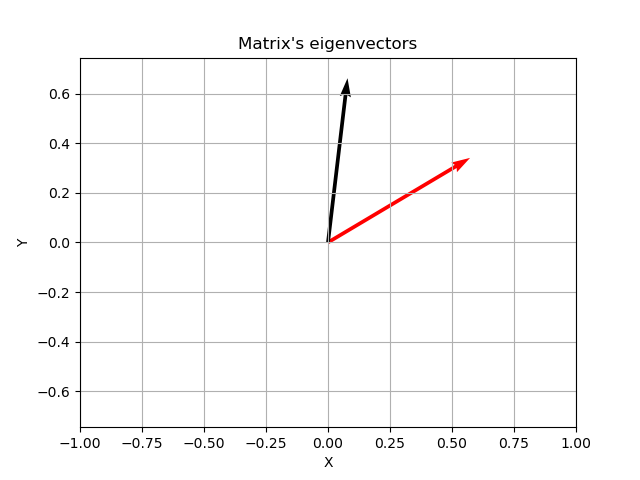

These two vectors form the basis of the vector space shown in the previous image.
However, it is noticeable that these vectors are not orthogonal.
One characteristic, which we do not have to account for, is that the eigenvectors returned by the numpy function are already nomalised.

The starting vectors are:
V1 (red arrow): [0.85942994 0.51125353]
V2 (black arrow): [0.11814182 0.99299673]
Meanwhile, the two vectors we are looking for are going to be called U1 and U2.

The first step is to choose one vector that will not change direction.
In this example we are going to choose V1, whose norm is already one, so it will stay the same.
U1 (red arrow): [0.85942994 0.51125353]

Knowing the projection of V2 over V1 (or over U1) we can determine that the direction of U2 will be V2 minus said projection.
Projection of V2 over V1: [0.52357134 0.31145959]
And by dividing this vector by its norm we end up with U2
U2 (green vector): [-0.51125353  0.85942994]

It can be proven that U1 and U2 are ort

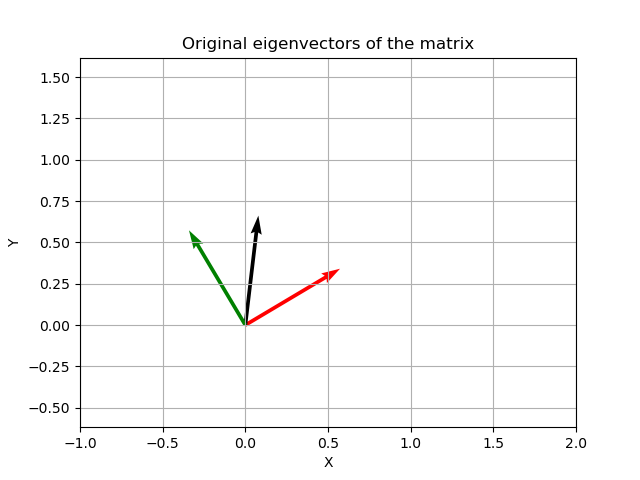

In [63]:
M = np.array([[2.0, -1.0],[5.0, -7.0]])
print(f'Matrix M:\n{M}')

eigenvalues, eigenvectors = np.linalg.eig(M) 
print("\nIn this exercise we are going to apply the Gram-Schmidt "\
      "orthogonalization to this matrix's eigenvectors.")
print(eigenvectors)


fig, ax = plt.subplots()
ax.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], color=['r'], scale_units='x', scale=1.5)
ax.quiver(0, 0, eigenvectors[0, 1], eigenvectors[1, 1], color=['k'], scale_units='x', scale=1.5)

ax.set_title('Matrix\'s eigenvectors')
_ = ax.grid()
_ = ax.axis('equal')
_ = ax.set(
    xlim=(-1.0, 1.0), 
    ylim=(-1.0, 1.0),
    xlabel='X', ylabel='Y')
plt.show()

print('These two vectors form the basis of the vector space shown in the previous image.')
print('However, it is noticeable that these vectors are not orthogonal.')
print('One characteristic, which we do not have to account for, is that the '\
      'eigenvectors returned by the numpy function are already nomalised.')

v1, v2 = eigenvectors[:,0], eigenvectors[:, 1]
print('\nThe starting vectors are:')
print('V1 (red arrow):', v1)
print('V2 (black arrow):', v2)
print('Meanwhile, the two vectors we are looking for are going to be called U1 and U2.')

print('\nThe first step is to choose one vector that will not change direction.')
print('In this example we are going to choose V1, whose norm is already one, '\
      'so it will stay the same.')
u1 = v1
print('U1 (red arrow):', u1)

print('\nKnowing the projection of V2 over V1 (or over U1) we can determine '\
      'that the direction of U2 will be V2 minus said projection.')
proj_v2_over_v1 = np.dot(v2, u1)*u1
print('Projection of V2 over V1:', proj_v2_over_v1)

print('And by dividing this vector by its norm we end up with U2')
y2 = v2 - proj_v2_over_v1
u2 = y2 / np.linalg.norm(y2)
print('U2 (green vector):', u2)

print('\nIt can be proven that U1 and U2 are orthogonal by doing its dot product.')
print('U1·U2:', np.dot(u1, u2))


fig, ax = plt.subplots()
ax.quiver(0, 0, v1[0], v1[1], color=['r'], scale_units='x', scale=1.5)
ax.quiver(0, 0, v2[0], v2[1], color=['k'], scale_units='x', scale=1.5)
ax.quiver(0, 0, u2[0], u2[1], color=['g'], scale_units='x', scale=1.5)
ax.set_title('Original eigenvectors of the matrix')
_ = ax.grid()
_ = ax.axis('equal')
_ = ax.set(
    xlim=(-1.0, 2.0), 
    ylim=(-1.0, 2.0),
    xlabel='X', ylabel='Y')

plt.show()


## Exercise 6

Explain briefly what is the QR decomposition of a matrix. Illustrate its application with an example.

### Explanation

La descomposición QR de una matriz $A$ consiste en expresarla como el producto de dos matrices $Q$ y $R$ de la forma $A = QR$, siendo $Q$ una matriz ortonormal y $R$ una matriz triangular superior.

Para obtener la matriz $Q$ se puede aplicar la ortogonalización de Gram-Schmidt sobre la matriz $A$.

Una vez calculada, debido a que $QQ^T = Q^TQ = I$, se puede resolver $A = QR$ de tal manera que $R = Q^TA$.

Uno de sus principales usos es la resolución de LLS (linear least squares), aunque también puede usarse para computar los autovalores y autovectores .

### Illustration

In [69]:
print(f'Matrix A:\n{M}\n')

Q = np.zeros((2,2))
Q[:, 0] = M[:, 0] / np.linalg.norm(M[:, 0])
proj_v2_over_v1 = np.dot(M[:, 1], Q[:, 0])*Q[:, 0]
y2 = M[:, 1] - proj_v2_over_v1
Q[:, 1] = y2 / np.linalg.norm(y2)
R = Q.T @ M

print('The matrix Q has to be an orthonormal matrix, therefore it can '\
      'be determined by applying the Gram-Schmidt orthogonalization.'\
      f'\nMatrix Q:\n{Q}\n')

print('The matrix R can be easily calculated as the product of Q transposed '\
      f'times A.\nMatrix R:\n{R}\n')

print('It is possible to verify this result by following the definition.')
print(f'Q times R:\n{Q@R}')

Matrix A:
[[ 2. -1.]
 [ 5. -7.]]

The matrix Q has to be an orthonormal matrix, therefore it can be determined by applying the Gram-Schmidt orthogonalization.
Matrix Q:
[[ 0.37139068  0.92847669]
 [ 0.92847669 -0.37139068]]

The matrix R can be easily calculated as the product of Q transposed times A.
Matrix R:
[[ 5.38516481e+00 -6.87072751e+00]
 [ 2.88657986e-15  1.67125804e+00]]

It is possible to verify this result by following the definition.
Q times R:
[[ 2. -1.]
 [ 5. -7.]]


## Exercise 7

Singular value decomposition (SVD)

1. Give a brief description of SVD.

3. Assume that matrix $A$ does not have full rank; that is, $A$ is $N \times M$ and $rank(A) = r < min(N, M)$. Explain how to compute the pseudoinverse  (Moore–Penrose inverse) of $A$ from the singular value decomposition.

5. Explain of how to use Singular Value Decomposition to compress an image (https://dmicz.github.io/machine-learning/svd-image-compression/). Illustrate the procedure with the Cameraman image (https://www.researchgate.net/figure/Original-cameraman-image_fig3_311456031).

## Exercise 8

Mahalanobis distance and whitening transformations.

1. Define the Mahalanobis distance. Illustrate its use in an application. 
2. Explain what is a whitening transformation. Illustrate the transformation with a simple example.
3. How would one use the whitening transformation to compute the Mahalanobis distance?
4. How would one use a whitening transformation to compute the pdf of a multivariate normal? Modify the code of the function `multivariate_normal_pdf` so that the pdf is computed using a whitening transformation. 1. Mahalanobis distance and whitening transformations.
1. Define the Mahalanobis distance. Illustrate its use in an application. 
2. Explain what is a whitening transformation. Illustrate the transformation with a simple example.
3. How would one use the whitening transformation to compute the Mahalanobis distance?
4. How would one use a whitening transformation to compute the pdf of a multivariate normal? Modify the code of the function `multivariate_normal_pdf` so that the pdf is computed using a whitening transformation. 

## Exercise 9

Explain briefly the PageRank algorithm (https://verso.mat.uam.es/~pablo.fernandez/google_ems_english.pdf). How does one build the matrix on which the algorithm is based? What role do eigenvalues and eigenvectors play? Provide a simple illustrative example of the algorithm.

## Exercise 10

Explain briefly how to use matrix factorization to build a recommender system. In particular, what is collaborative filtering? What does "filtering" mean in this context? What does "colaborative" mean in this context? Y. Koren, R. Bell and C. Volinsky, "Matrix Factorization Techniques for Recommender Systems," in Computer, vol. 42, no. 8, pp. 30-37, Aug. 2009, https://doi.org/10.1109/MC.2009.263. (access with UAM VPN).

## Exercise 11

Graph eigenvalues

1. Define the eigenvalues of a graph.
2. Explain what is the adjacency matrix of a graph. Illustrate how can one use the adjacency matrix to compute the number of paths between any two nodes in the graph.
4. Explain what is the Laplacian matrix of a graph.
5. Explain the meaning of the eigenvalues and eigenvectors of a graph. Illustrate with an example of a graph how spectral analysis can be used to quantify the centrality of nodes in the graph.
6. What do the Fiedler value and the Fiedler vector of a graph represent? 
7. Explain how to build a weighted graph to reprsent a social network. Illustrate with a simple example how can the spectrum of a weighted-graph be used to find communities in a social network X. 